In [58]:
int('5') == 5

True

In [76]:
zeroth_alphabet=' ABCDEFGHIJKLMNOPQRSTUVWXYZ'

CODE  = "JYPFFQVY"
DATE  = "11232024"
CODE2 = "FORTHELO"
CODE3 = "VEOFPLAY"

def pprint(s):
    print(s + " " + str([zeroth_alphabet.index(c) for c in s]))

def shift(text, offsets, alphabet):
    result = ''

    for i in range(len(text)):
        letter_n = alphabet.index(text[i])
        offset = offsets[i]
        offset = int(offset) if offset.isdigit() else alphabet.index(offset)
        value = (letter_n - offset) % len(alphabet)
        result += alphabet[value]

    pprint(result)
    return result

a = shift(CODE, DATE, zeroth_alphabet)
b = shift(a, CODE2, zeroth_alphabet)
c = shift(b, CODE3, zeroth_alphabet)

IXNCDQTU [9, 24, 14, 3, 4, 17, 20, 21]
CIWJWLHF [3, 9, 23, 10, 23, 12, 8, 6]
HDHDG GH [8, 4, 8, 4, 7, 0, 7, 8]


In [19]:
o='01233456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
C_alphabet='ABCDEFGHIJKLMNOPQRSTUVWXYZ'
C_alphabet0='ABCDEFGHIJKLMNOPQRSTUVWXYZ01233456789'

def vigenere(
        text: str, 
        key: str,
        alphabet=C_alphabet,
        encrypt=True
):
    result = ''

    for i in range(len(text)):
        print(str(len(alphabet)) + " " + str(i))
        letter_n = alphabet.index(text[i])
        key_n = alphabet.index(key[i % len(key)])

        if encrypt:
            value = (letter_n + key_n) % len(alphabet)
        else:
            value = (letter_n - key_n) % len(alphabet)

        result += alphabet[value]

    return result

def vigenere_encrypt(text, key):
    return vigenere(text=text, key=key, encrypt=True)

def vigenere_decrypt(text, key):
    return vigenere(text=text, key=key, encrypt=False)

def str_to_letter_number(text):
    return [ord(c)-ord('A') for c in text]

def ordinal_add(text, offsets, alphabet=C_alphabet):
    result = ''

    for i in range(len(text)):
        letter_n = alphabet.index(text[i])
        if i >= len(offsets):
            print(len(text))
            print(len(offsets))
            print("wat")
        offset = alphabet.index(text[i])
        value = (letter_n + offset) % len(alphabet)
        result += alphabet[value]

    return result

def letter_number_to_str(nums):
    return "".join([chr(c + ord('A')) for c in nums])

# What if we assume that the result is in the range: ABCDEFGHIJ which can be converted straight to 0-9?
# Then we can calculate a "distance" from the desired character space.
def distance_str(text):
    dist = distance(text)
    return f"{text} (distance={sum(dist)} {dist})"

def distance(text):
    result=[]
    for c in text:
        o = ord(c)-ord('A')
        if o >= 0 and o <= 9:
            result+=[0]
        else:
            result+= [min(o-8, ord('Z')-ord(c)+1)]
    return result

def vigenere_decrypt_n(text, keys):
    texts = [text]
    for key in keys:
        text = vigenere(text, key, C_alphabet, False)
        texts += [text]
    
    print("\n".join([distance_str(s) for s in texts]))
    return text

In [78]:

print(ord('Z') - ord('0'))
print(115 % 42)
print((ord('?') + 31))
print()
for i in range(ord('0'), ord('Z')):
    print(str(i) + " ", end="")

print()
for i in range(ord('0'), ord('Z')):
    print(str(i-ord('0')) + " ", end="")

print()
for i in range(ord('0'), ord('Z')):
    print(chr(i) + "  ", end="")

42
31
94

48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 
0  1  2  3  4  5  6  7  8  9  :  ;  <  =  >  ?  @  A  B  C  D  E  F  G  H  I  J  K  L  M  N  O  P  Q  R  S  T  U  V  W  X  Y  

In [46]:
CODE = "JYPFFQVY"
CODE2 = "HZLAOMLM"
TIME = "11232024"


a = ''.join([chr(ord(s)+-2) for s in CODE])
print(distance_str(a))

b = vigenere(a, CODE2)
print(distance_str(b))


c = vigenere(b, CODE)
print(distance_str(c))

# a = ordinal_add(TIME, [-2] * len(CODE))
# b = vigenere(a, CODE2)
# print(distance_str(b))
# c = ordinal_add(b, TIME)
# print(distance_str(c))
# d = ordinal_add(b, [-1 * int(c) for c in TIME])
# print(distance_str(d))


HWNDDOTW (distance=26 [0, 4, 5, 0, 0, 6, 7, 4])
OVYDRAEI (distance=22 [6, 5, 2, 0, 9, 0, 0, 0])
XTNIWQZG (distance=28 [3, 7, 5, 0, 4, 8, 1, 0])


In [51]:
CODE = "JYPFFQVY"
CODE2 = "HZLAOMLM"
TIME = "11232024"

b = vigenere_decrypt(CODE, CODE2)
print(distance_str(b))
c = ordinal_add(b, TIME)
print(distance_str(c))
d = ordinal_add(b, [-1 * int(c) for c in TIME])
print(distance_str(d))


CZEFREKM (distance=16 [0, 1, 0, 0, 9, 0, 2, 4])
DAGITEMQ (distance=19 [0, 0, 0, 0, 7, 0, 4, 8])
BYCCPEII (distance=9 [0, 2, 0, 0, 7, 0, 0, 0])


In [ ]:
CODE = "JYPFFQVY"
TIME = "11232024"
a = ordinal_add("PLAYPLAY", TIME)
print(a)
b = vigenere_decrypt("JYPFFQVYIATIIFFTFF", a)
print(b)

QMCBRLCC
TMNEOFTWSORHRUDRPT


In [ ]:
CODE = "JYPFFQVY"
TIME = "11132008"
a = ordinal_add("PLAYPLAY", TIME)
print(a)
b = vigenere_decrypt(CODE, a)
print(b)

QMBBRLAG
TMOEOFVS


In [26]:
CODE = "JYPFFQVY"
TIME = "11232024"
a = ordinal_add("PLAYPLAY", TIME)
print(a)
b = vigenere_decrypt(CODE, a)
print(b)


QMCBRLCC
TMNEOFTW


**Journal**

In catacombs with dusty pages

As paladins or rogues or mages

Through all the wars that never cease

In search of hope

In search of peace

For all the journeys, in any weather, 

For adventures yet to come together

The final key is why I stay

For you

For Azeroth

**Cryptic Plaque**

To be like me you'll need to know

The missing rhyme

The crystal's glow

The stars above

The space below

The time of now

for long ago

JYPFFQVY

**Flipped horizontally and vertically so the journal and crystal are the expected ways up**
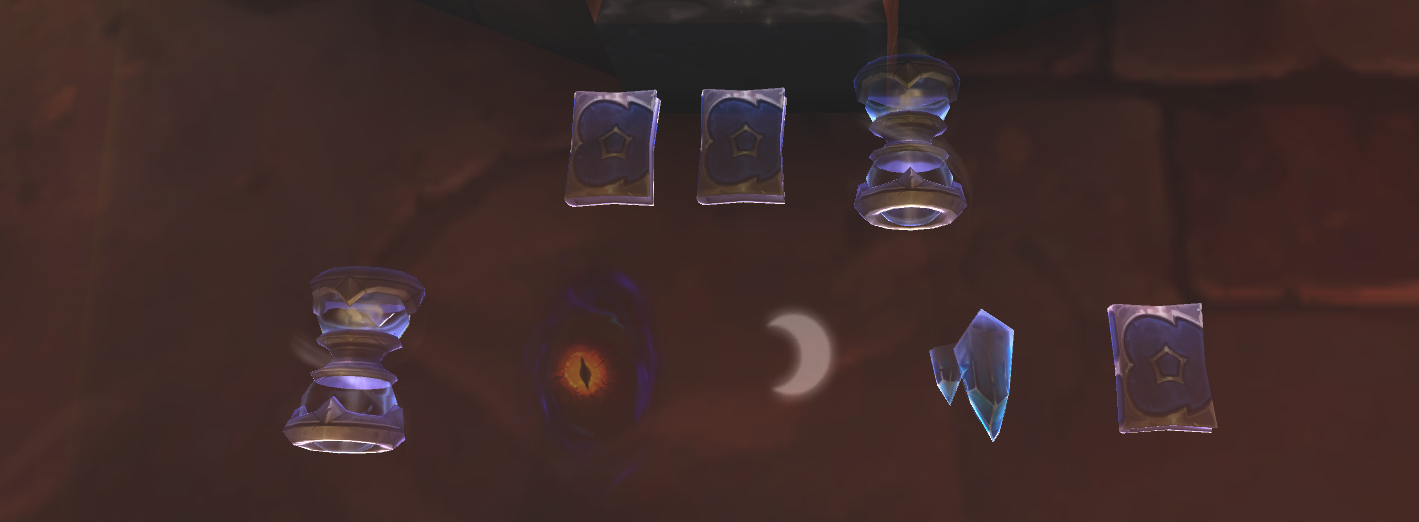

time + below + above + crystal = note

note + journal = new time

In [71]:
CODE = "JYPFFQVY"
# KEYS = ["PLAY", "GLOW", "ABOVE", "BELOW", "BIRTHDAY"]
# KEYS = ["PLAY", "HOPE", "BIRTHDAY", "HOME"]
KEYS = ["BIRTHDAY", "BELOW", "ABOVE", "GLOW", "PLAY"]

KEYS = ["PLAY", "BLUE", "WARDENS", "VOID"]

# KEYS = [''.join(reversed(k)) for k in KEYS]
# print(KEYS)
t = ordinal_add(t, "11232024")
vigenere_decrypt_n(CODE, KEYS)

JYPFFQVY (distance=24 [0, 2, 7, 0, 0, 8, 5, 2])
UNPHQFVA (distance=31 [6, 5, 7, 0, 8, 0, 5, 0])
TCVDPUBW (distance=29 [7, 0, 5, 0, 7, 6, 0, 4])
XCEALHJA (distance=6 [3, 0, 0, 0, 3, 0, 0, 0])
COWXQTBX (distance=31 [0, 6, 4, 3, 8, 7, 0, 3])


'COWXQTBX'

**A clue, hotfixed.**

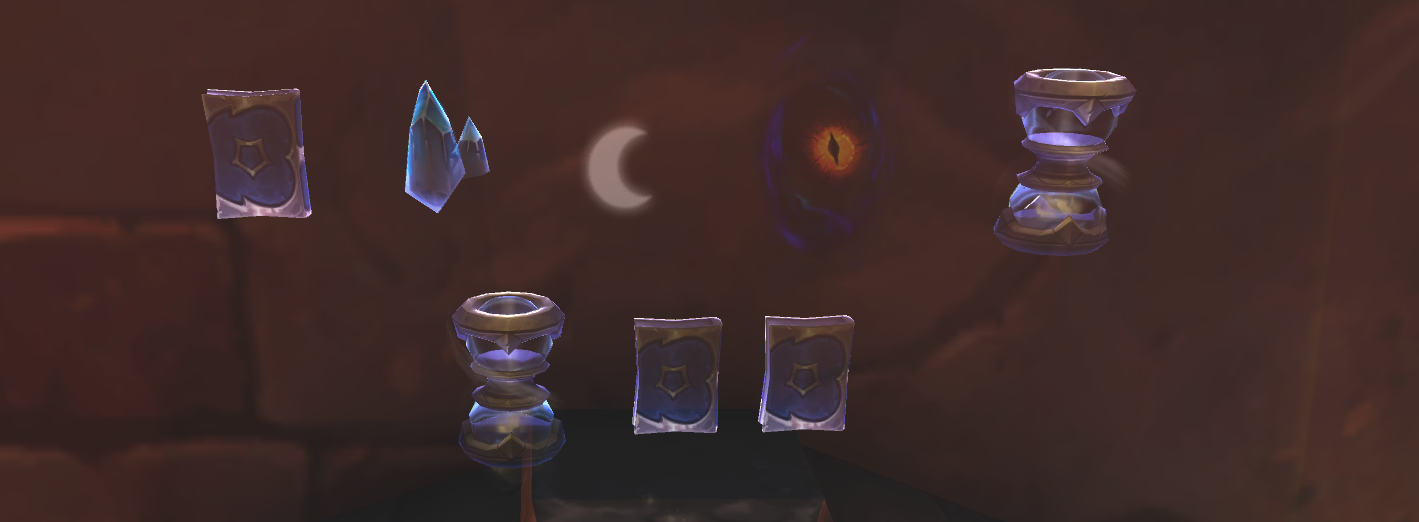

In [23]:
CODE = "JYPFFQVY"
KEYS = ["PLAY", "GLOW", "ABOVE", "BELOW", "BIRTHDAY"]
KEYS = ["PLAY", "HOPE", "BIRTHDAY", "HOME"]
# KEYS = [''.join(reversed(k)) for k in KEYS]
print(KEYS)
t = vigenere_decrypt_n(CODE, KEYS)
ordinal_add(t, "11232024")

['PLAY', 'HOPE', 'BIRTHDAY', 'HOME']
JYPFFQVY (distance=24 [0, 2, 7, 0, 0, 8, 5, 2])
UNPHQFVA (distance=31 [6, 5, 7, 0, 8, 0, 5, 0])
NZADJRGW (distance=19 [5, 1, 0, 0, 0, 9, 0, 4])
MRJKCOGY (distance=23 [4, 9, 0, 2, 0, 6, 0, 2])
FDXGVAUU (distance=20 [0, 0, 3, 0, 5, 0, 6, 6])


'GEZJXAWY'

**Hypothesis: series of vigenere ciphers**

**FACTS:**
 - It could not be solved until the vault was opened
 - We have all the information required.
 - The code on the plaque is localised
 - Ratts is cheeky

**ASSUMPTIONS:**
 - The result is a word that leads to the code
 - The presence of symbols and hex in code's localisations indicates that the characters as converted integers at some stage
 - Each line of the plaque's text relates to another word in the catacombs
 - The character 'A' is at index 0
 - Each step accepts and returns 8 characters (or a multiple thereof) that matches the datetime of the anniversary, too.

In [88]:
CODE = "JYPFFQVY"
# KEYS = ["TAIL", "PEACE", "HOPE", "CATACOMB"]
# KEYS = ["TAIL", "HOPE", "VIG", "PEACE"]
KEYS = ["TAIL", "PEACE", "HOPE", "HOME", "BIRTHDAY", "PLAY"]
t = vigenere_decrypt_n(CODE, KEYS)


JYPFFQVY (distance=24)
QYHUMQNN (distance=38)
BUHSIBJN (distance=19)
UGSOBNUJ (distance=31)
NSGKUZIF (distance=22)
MKPRNWIH (distance=31)
XZPTYLIJ (distance=23)


In [100]:
CODE = "JYPFFQVY"
KEYS = ["VEILTAIL", "HOPE", "PRAY", "SHADOWS", "BIRTHDAY", "PLAY"]
t = vigenere_decrypt_n(CODE, KEYS)


JYPFFQVY (distance=24 [0, 2, 7, 0, 0, 8, 5, 2])
OUHUMQNN (distance=40 [6, 6, 0, 6, 4, 8, 5, 5])
HGSQFCYJ (distance=18 [0, 0, 8, 8, 0, 0, 2, 0])
SPSSQLYL (distance=47 [8, 7, 8, 8, 8, 3, 2, 3])
AISPCPGT (distance=29 [0, 0, 8, 7, 0, 7, 0, 7])
ZABWVMGV (distance=19 [1, 0, 0, 4, 5, 4, 0, 5])
KPBYGBGX (distance=14 [2, 7, 0, 2, 0, 0, 0, 3])


In [90]:
CODE = "JYPFFQVY"
KEYS = ["TAIL", "GOLD", "ASTRAL", "SHADOWS", "BIRTHDAY", "PLAY"]
t = vigenere_decrypt_n(CODE, KEYS)


JYPFFQVY (distance=24)
QYHUMQNN (distance=38)
KKWRGCCK (distance=19)
KSDAGRCS (distance=27)
SLDXSVKA (distance=29)
RDMELSKC (distance=26)
CSMGWHKE (distance=18)


### Hypothesis: series of keys, reverse


In [91]:
CODE = "JYPFFQVY"
KEYS = ["TAIL", "PEACE", "HOPE", "HOME", "BIRTHDAY", "PLAY"]
KEYS = [''.join(reversed(k)) for k in KEYS]
t = vigenere_decrypt_n(CODE, KEYS)


JYPFFQVY (distance=24)
YQPMUIVF (distance=32)
UOPIFETF (distance=26)
QZBBBPFY (distance=18)
MNNUXDRR (distance=41)
ONKNEMJQ (distance=30)
QNZYGMYB (distance=22)


## Hypothesis: series of steps using text in the catacombs, vignere ciphers, and shifts

**FACTS:**
 - It could not be solved until the vault was opened
 - We have all the information required.
 - The code on the plaque is localised
 - Ratts is cheeky

**ASSUMPTIONS:**
 - The result is either a word that leads to the code or the code itself
 - The presence of symbols and hex in code's localisations indicates that the characters as converted integers at some stage
 - The plaque's text is meant to be taken more literally 
 - The character 'A' is at index 0
 - Each step accepts and returns 8 characters (or a multiple thereof). Matches the datetime of the anniversary, too.
 - Unnecessary capitalisations, when present, may be significant (eg. Veil and Tail)
 - The solution itself it not in the plaque - even encrypted - because it would be too suceptible to brute force attacks and guesses.

In [ ]:
WVT = "WVT"
glow = ""
VIG = "VIG"
CODE = "JYPFFQVY"
TIME = "11232024"

def solve(rhyme, glow, above, below, time, final_key):
    ciphertext = rhyme + glow + above
    # print("C   = " + ciphertext)
    plaintext = vigenere(ciphertext, below, C_alphabet_with_numbers, False) 
    # print("P   = " + plaintext)
    # Shift using the anniversary date
    plaintext_shifted = ordinal_add(plaintext, time, C_alphabet_with_numbers)
    # print("P'  = " + plaintext_shifted)
    final = vigenere(plaintext_shifted, final_key, C_alphabet_with_numbers, False)
    # print("P'' = " + final)
    print("C = "+ciphertext +" P = " + plaintext + " P' = " +plaintext_shifted + " F = " + final)

solve(WVT, "18", VIG, CODE, TIME, "PLAY")
solve(WVT, "17", VIG, CODE, TIME, "PLAY")
solve(WVT, "ZG", VIG, CODE, TIME, "PLAY")
solve(WVT, "UP", VIG, CODE, TIME, "PLAY")

# TIME = [-1 * int(c) for c in TIME]
# solve(WVT, "18", VIG, CODE, TIME, "PLAY")
# solve(WVT, "17", VIG, CODE, TIME, "PLAY")
# solve(WVT, "ZG", VIG, CODE, TIME, "PLAY")
# solve(WVT, "UP", VIG, CODE, TIME, "PLAY")

# Possible values for GLOW are mostly numbers so to keep the length matching
# code, WVT and VIG need to change.


def solve_glow_is_shift(rhyme, glow, below, time, final_key):
    ciphertext = ordinal_add(rhyme, glow, C_alphabet0)
    ciphertext_shifted = ordinal_add(rhyme, glow, C_alphabet0)
    # The stars above (vigenere using the SPACE BELOW as the key)
    plaintext = vigenere(ciphertext, below, C_alphabet0, False)
    plaintext_shifted = ordinal_add(plaintext, time, C_alphabet0)
    final = vigenere(plaintext_shifted, final_key, C_alphabet0, False)
    print(f"R[hyme] = {rhyme} C = {ciphertext} C' = {ciphertext_shifted} P = {plaintext} P' = {plaintext_shifted} F = {final}")


RHYMES = ["DOOMTOMB", "TAILBLUE"]
GLOWS_AS_SHIFT = [-2, 17, 18, 5]

for rhyme in RHYMES:
    for glow in GLOWS_AS_SHIFT:
        solve_glow_is_shift(rhyme, [glow]*len(rhyme), CODE, TIME, "PLAY")
        solve_glow_is_shift(rhyme, [glow]*len(rhyme), CODE, [-1 * int(c) for c in TIME], "PLAY")




C = WVT18VIG P = CX3LT4NI P' = DY4OV4PM F = OCUQ5JEO
C = WVT17VIG P = CX3LS4NI P' = DY4OU4PM F = OCUQ4JEO
C = WVTZGVIG P = CX3J14NI P' = DY4M34PM F = OCUODJEO
C = WVTUPVIG P = CX3E94NI P' = DY4HB4PM F = OCUJMJEO
R[hyme] = DOOMTOMB C = BMMKRMK9 C' = BMMKRMK9 P = 3Z7FM60M P' = 309IO62Q F = OP9V9W23
R[hyme] = DOOMTOMB C = BMMKRMK9 C' = BMMKRMK9 P = 3Z7FM60M P' = 2Y5CK6YI F = NN5P5WYV
R[hyme] = DOOMTOMB C = U443943S C' = U443943S P = LHQY4PI4 P' = MIS16PK8 F = 77SDSEKL
R[hyme] = DOOMTOMB C = U443943S C' = U443943S P = LHQY4PI4 P' = KGOV3PG1 F = 55O7OEGD
R[hyme] = DOOMTOMB C = V553A53T C' = V553A53T P = MIRY5QI5 P' = NJT17QK9 F = 88TDTFKM
R[hyme] = DOOMTOMB C = V553A53T C' = V553A53T P = MIRY5QI5 P' = LHPV3QG2 F = 66P7OFGE
R[hyme] = DOOMTOMB C = ITTRYTRG C' = ITTRYTRG P = 95EMTD6T P' = A6GPVD8X F = WWG2G389
R[hyme] = DOOMTOMB C = ITTRYTRG C' = ITTRYTRG P = 95EMTD6T P' = 84CJRD4P F = UUCWC342
R[hyme] = TAILBLUE C = R8GJ9JSC C' = R8GJ9JSC P = IL2E437P P' = JM3H639T F = 4B3USS95
R[hyme] = TAIL

**On localisation:**

Given

- The result is either a word that leads to the code or the code itself

when performing operations, the result can be:

```
Localised + localised = localised OR invariant
Localised + invariant = localised
Invariant + invariant = invariant
```